In [16]:
import sqlite3 as lite
import jieba
import pandas as pd
tags = []
corpus = []
titles = []
with lite.connect('news.sqlite') as db:
    cur = db.cursor()
    cur.execute('select summary, title, category from news_entry;')
    data = cur.fetchall()
    for rec in data:
        #if rec[2].encode('utf-8') in ['娛樂', '社會', '財經']:
        if rec[2].encode('utf-8') in ['娛樂', '社會']:
            corpus.append(' '.join(jieba.cut(rec[0])))
            titles.append(rec[1])
            if rec[2].encode('utf-8') == '娛樂':
                tags.append(0)
            else:
                tags.append(1)


In [17]:
import jieba
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X =vectorizer.fit_transform(corpus)
word =vectorizer.get_feature_names()


In [18]:
from sklearn.cross_validation import train_test_split
train_data,test_data,train_tag,test_tag, train_title, test_title=train_test_split(X,tags,titles,test_size=0.30,random_state=42)

In [19]:
from sklearn.naive_bayes import MultinomialNB
clf= MultinomialNB(alpha=0.01)
clf.fit(train_data,train_tag)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [20]:
s = u'天道盟太陽會見違法詐騙行為簡單，且取得大筆金錢快速、容易，一年多前在桃園市南區成立詐騙行動中心，由23歲的黃姓男子(有多項恐嚇、傷害及毒品前科)擔任該中心行動、詐騙組組長，和騙集團合作，由海外打電話詐騙國人，並吸收多名未成少年擔任車手，在國內提款機四處取款，一年來得手詐騙金額新台幣數百萬元。'
s1 = u'徐懷鈺「無法抄襲」Jolin 徐懷鈺'
sentences = [s, s1]

import numpy
nparray = np.array([0] * len(vectorizer.get_feature_names()))
ary = [ele for ele in jieba.cut(s)]
for ele in ary:
    try:
        if word.index(ele.lower()) >= 0:
            nparray[word.index(ele.lower())] = ary.count(ele)           
    except:
        pass

a = csr_matrix(nparray, dtype=np.int8)
print a.toarray()[0]

pred=clf.predict(a[0])
print pred[0]

NameError: name 'csr_matrix' is not defined

In [21]:
import numpy
def getPrediction(sentences):
    result = []
    for sentence in sentences:
        nparray = np.array([0] * len(vectorizer.get_feature_names()))
        ary = [ele for ele in jieba.cut(sentence)]
        for ele in ary:
            try:
                if word.index(ele.lower()) >= 0:
                    nparray[word.index(ele.lower())] = ary.count(ele)           
            except:
                pass
        result.append(nparray)
    return result

In [22]:
s = u'天道盟太陽會見違法詐騙行為簡單，且取得大筆金錢快速、容易，一年多前在桃園市南區成立詐騙行動中心，由23歲的黃姓男子(有多項恐嚇、傷害及毒品前科)擔任該中心行動、詐騙組組長，和騙集團合作，由海外打電話詐騙國人，並吸收多名未成少年擔任車手，在國內提款機四處取款，一年來得手詐騙金額新台幣數百萬元。'
s1 = u'徐懷鈺「無法抄襲」Jolin 徐懷鈺'
sentences = [s, s1]

result = getPrediction(sentences)
a = csr_matrix(result, dtype=np.int8)
pred=clf.predict(a)
print pred
print pred[0]

NameError: name 'csr_matrix' is not defined

In [23]:
#encoding=utf-8
import jieba
s = u'天道盟太陽會見違法詐騙行為簡單，且取得大筆金錢快速、容易，一年多前在桃園市南區成立詐騙行動中心，由23歲的黃姓男子(有多項恐嚇、傷害及毒品前科)擔任該中心行動、詐騙組組長，和騙集團合作，由海外打電話詐騙國人，並吸收多名未成少年擔任車手，在國內提款機四處取款，一年來得手詐騙金額新台幣數百萬元。'
jieba.load_userdict('qoo.txt')
for ele in jieba.cut(s):
    print ele,

天道盟 太陽會 見 違法詐 騙行 為 簡單 ， 且 取得 大筆 金錢 快速 、 容易 ， 一年 多前 在 桃園 市南 區 成立 詐騙 行動 中心 ， 由 23 歲 的 黃 姓 男子 ( 有多項 恐嚇 、 傷害 及 毒品 前科 ) 擔任 該 中心 行動 、 詐騙 組組長 ， 和 騙 集團 合作 ， 由 海外 打電話 詐騙 國人 ， 並 吸收 多名 未 成 少年 擔任 車手 ， 在 國內 提款機 四處 取款 ， 一年 來 得手 詐騙 金額 新 台幣 數百萬元 。


In [24]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [26]:
from sklearn.naive_bayes import MultinomialNB
clf= MultinomialNB(alpha=0.01)
probas_ = clf.fit(train_data,train_tag).predict_proba(test_data)

In [12]:
#print probas_

In [27]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test_tag, probas_[:, 1])
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.980038


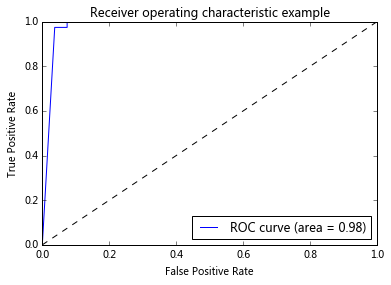

In [29]:
# Plot ROC curve
import pylab as pl
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()